# Исследование данных о продажах игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План выполнения исследования:**
1. Открыть и изучить общую информацию о файле.


2. Предобработать данные.
* Заменить названия столбцов;
* Преобразовать данные в нужные типы;
* Обработать пропуски;
* Посчитать и добавить в таблицу столбец: суммарные продажи во всех регионах.


3. Исследовать данные.
* Посмотреть, сколько игр выпускалось в разные годы;
* Посмотреть, как менялись продажи по платформам;
* Определить актуальный период в данных;
* Определить какие платформы лидируют по продажам, растут или падают;
* Посмотреть, как влияют на продажи отзывы пользователей и критиков;
* Посмотреть на общее распределение игр по жанрам, выделяются ли жанры с высокими и низкими продажами.


4. Составить портрет пользователя каждого региона.
* самые популярные платформы;
* самые популярные жанры;
* влияет ли рейтинг ESRB на продажи.


5. Проверить гипотезы.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.


6. Составить общий вывод.

### Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('***.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


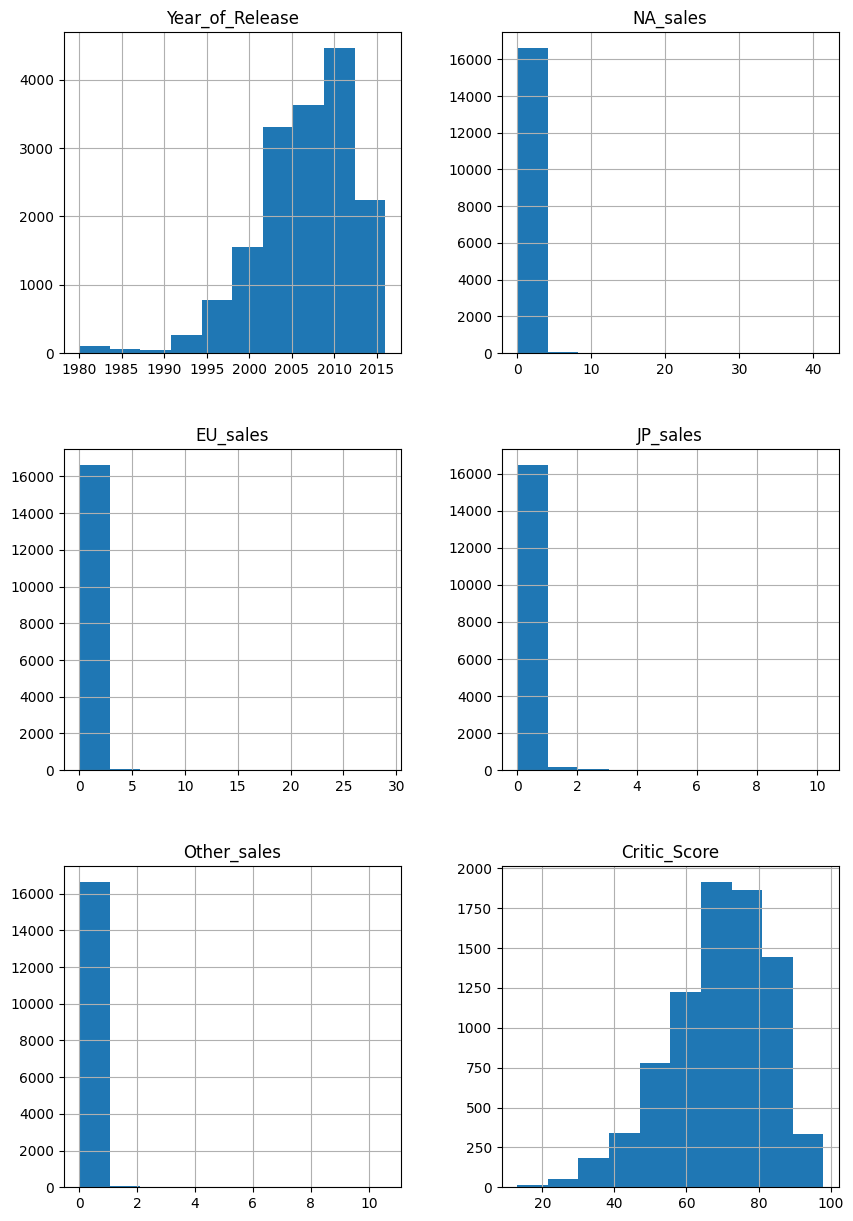

In [5]:
data.hist(figsize=(10, 15));

### Предобработка данных

Заменим названия столбцов (приведем к нижнему регистру).

In [6]:
data.columns = data.columns.str.lower()

Проверим есть ли в данных явные дубликаты.

In [7]:
data.duplicated().sum()

0

Выведем уникальные значения столбцов platform, genre, rating для поиска неявных дубликатов. Столбец name вручную проверять на неявные дубликаты не будем.

In [8]:
np.sort(data['platform'].unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [9]:
np.sort(list(data['genre'].unique()))

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'nan'], dtype='<U32')

In [10]:
np.sort(list(data['rating'].unique()))

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'nan'],
      dtype='<U32')

In [11]:
data.query('rating == "K-A" | rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.00,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Значения выглядят уникальными, только значение 'K-A' в столбце rating является устаревшим, сейчас заменено на 'E', далее мы будем анализировать только актуальный период в данных, три строки в 96-97 годах, вероятнее всего в него не войдут. Рейтинг 'RP' обозначает, что рейтинг ожидается, т.е. это пропуск, пропуски заполним значением заглушкой.

In [12]:
data['rating'] = data['rating'].fillna('unknown')

Выведем уникальные значения столбца critic_score.

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Изменим вещественный тип данных на целочисленный в столбцах year_of_release и critic_score, дробной части у них нет, у года ее не может быть, оценку критиков мы проверили.

In [14]:
data['year_of_release'] = data['year_of_release'].convert_dtypes()
data['critic_score'] = data['critic_score'].convert_dtypes()

Рассмотрим уникальные значения столбца user_score.

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце встречается значение 'tbd', оно означает что оценка будет определена, получается ее нет, можем заменить на пропуск и преобразовать тип данных в вещественный.

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

data['user_score'] = data['user_score'].astype(float)

Посмотрим сколько пропусков в данных.

In [17]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(10,3), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

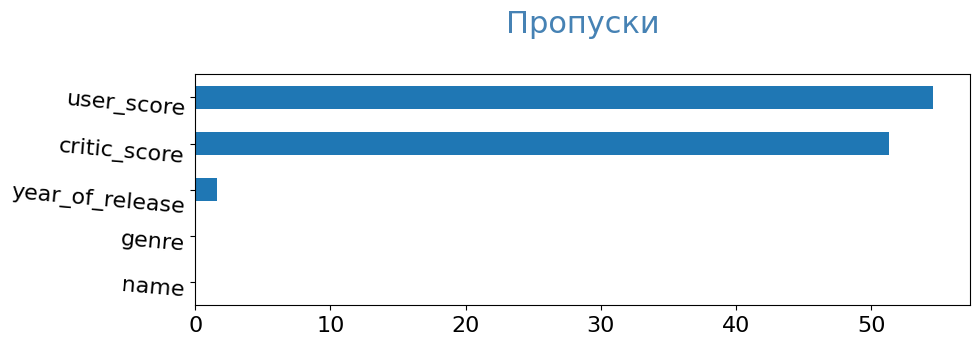

In [18]:
pass_value_barh(data)

In [19]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,unknown


In [20]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,unknown


В столбцах year_of_release, genre и name пропуски можно удалить, потери не будут превышать 2%, далее мы будем анализировать только актуальный период в данных, строки без обозначения года туда не войдут, строк без указания игры и ее жанра всего две. Восстановить значения оценок и рейтинга достоверными данными невозможно, используя доступную нам информацию, эти пропуски мы оставим, возможно они появились в результате некорректной выгрузки.

In [21]:
data = data.dropna(subset=['name', 'year_of_release'])

**Уровень потерь записей на этапе предобработки составляет 1,6%.**

Посчитаем суммарные продажи во всех регионах и запишем их в столбец total_sales.

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

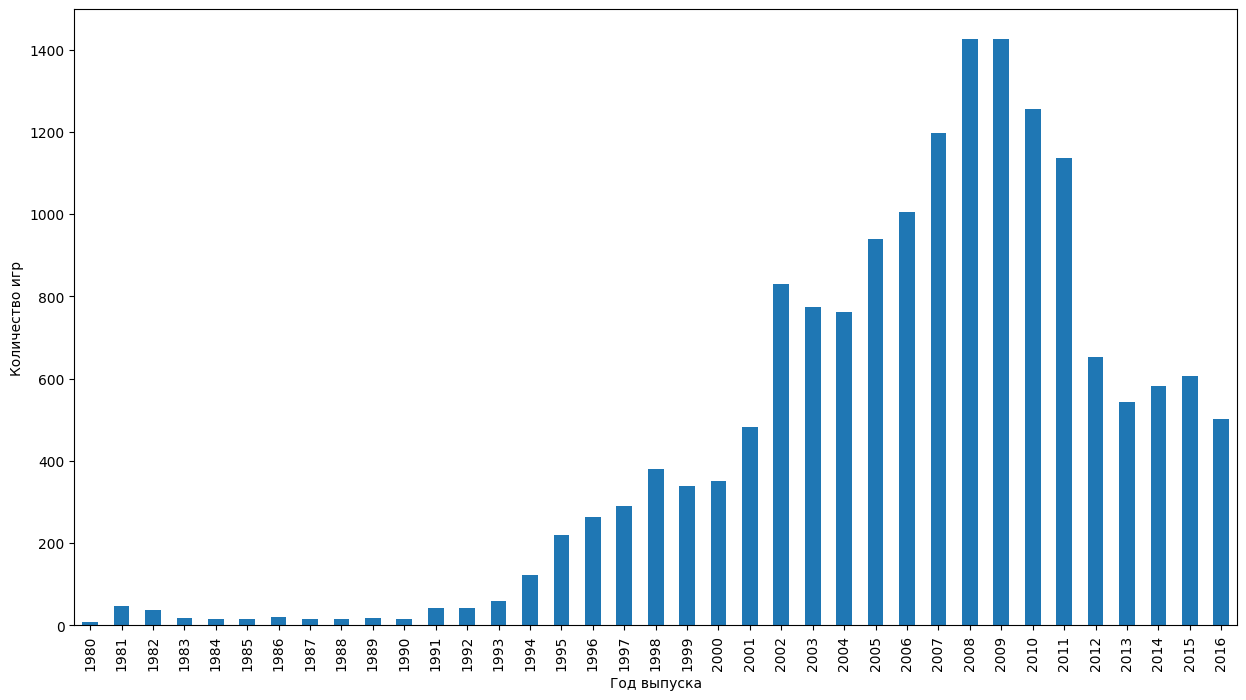

In [23]:
(
data
.pivot_table(
    index=['year_of_release'], 
    values=['name'], 
    aggfunc='count')
.plot(
    y='name',
    kind='bar',
    figsize=(15,8), 
    xlabel='Год выпуска', 
    ylabel='Количество игр', 
    legend=False)
);

До 2000 года выпускалось очень мало игр. С 2000 по 2009 год наблюдается рост количества игр. С 2010 года по 2013 падение и с 2013 года снова рост (данные за 2016 год могут быть не полными). Для построения прогноза на 2017 год стоит учитывать только данные с 2013 года. В игровой индустрии происходит много изменений, не верно будет рассматривать более поздние данные. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Топ-10 платформ с наибольшими суммарными продажами.

In [24]:
top_platform_data = data.pivot_table(
                                     index=['platform'],
                                     values='total_sales', 
                                     aggfunc='sum').sort_values(by='total_sales').tail(10)
top_platform_data

,total_sales
platform,
3DS,257.81
PSP,289.53
GBA,312.88
PS4,314.14
PS,727.58
DS,802.78
Wii,891.18
PS3,931.34
X360,961.24


Посмотрим на суммарные продажи самых успешных платформ с 2000 года.

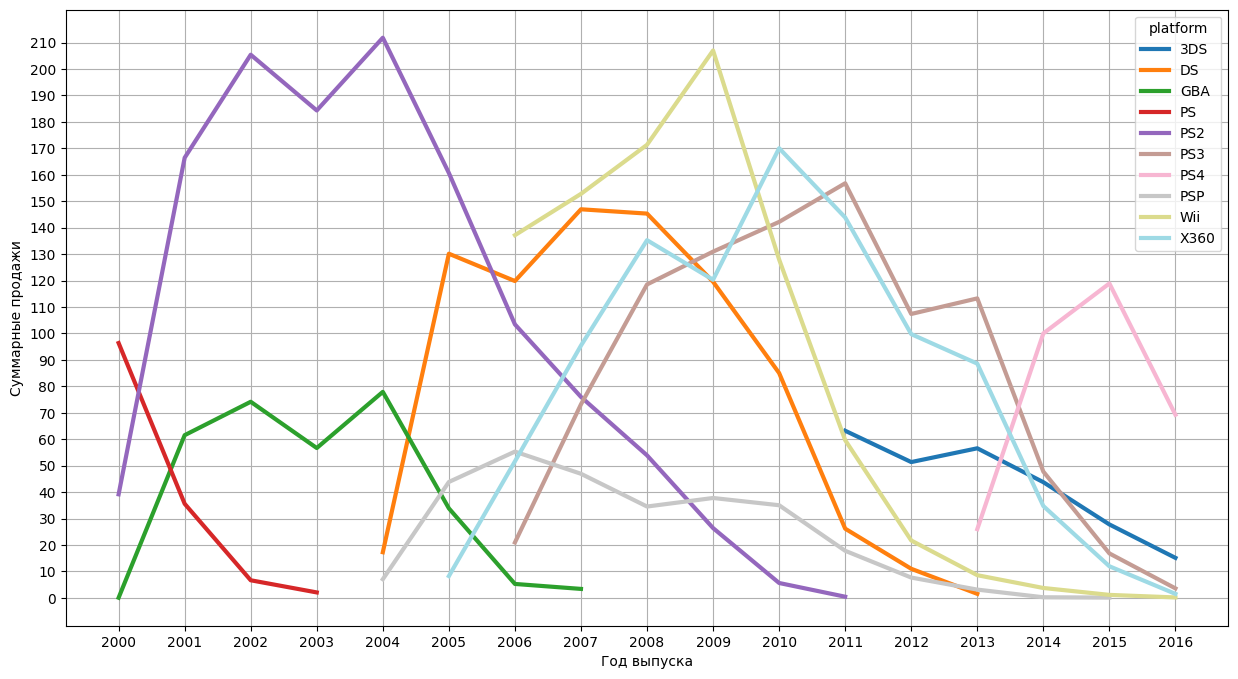

In [25]:
top_platform = top_platform_data.index

(
data
.query('platform in @top_platform and year_of_release >= 2000')
.pivot_table(
    index=['year_of_release'],
    columns='platform',
    values='total_sales', 
    aggfunc='sum')
.plot(
    grid=True, 
    figsize=(15,8), 
    xlabel='Год выпуска', 
    ylabel='Суммарные продажи', 
    linewidth=3, 
    cmap='tab20')
)
plt.xticks(np.arange(2000,2017,1))
plt.yticks(np.arange(0,220,10));

По данным с 2000 года среди платформ с наибольшими суммарными продажами можно наблюдать, что со стартом продаж новых игр на более новых платформах остальные продажи падают, в 2013 году начали выходить игры на PS4 и все остальные платформы пошли на спад, оставим для дальнейшего анализа данные с 2013 года.

In [26]:
data_actual = data.loc[data['year_of_release'] >= 2013]

Посмотрим какие платформы лидируют по продажам, растут или падают.

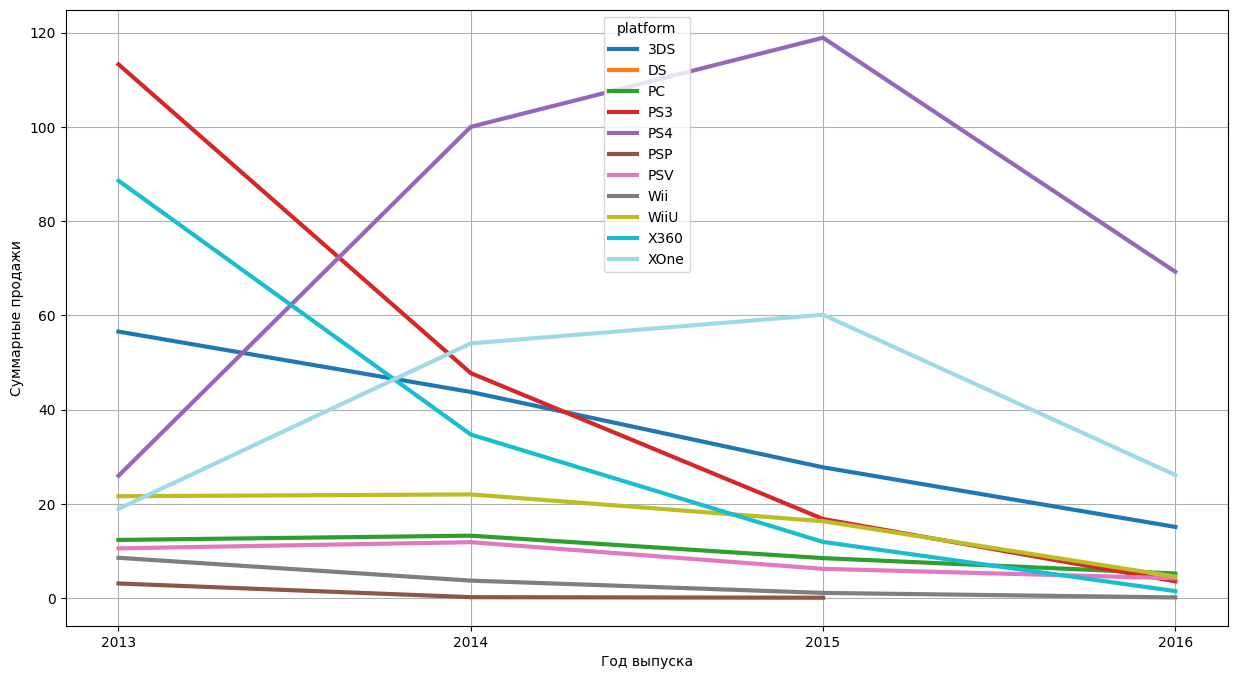

In [27]:
(
data_actual.pivot_table(
    index=['year_of_release'],
    columns='platform',
    values='total_sales', 
    aggfunc='sum')
.plot(
    grid=True, 
    figsize=(15,8), 
    xlabel='Год выпуска', 
    ylabel='Суммарные продажи', 
    linewidth=3, 
    cmap='tab20')
)
plt.xticks(np.arange(2013,2017,1));

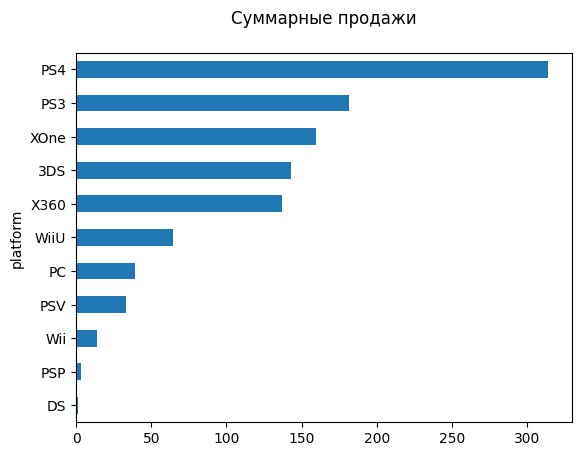

In [28]:
(
data_actual.pivot_table(
    index=['platform'],
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales')
.plot(
    y='total_sales',
    kind='barh',
    legend = False
)
.set_title('Суммарные продажи' + '\n')
);

Потенциально прибыльными платформами можно считать PS4 и XOne, у PS3, 3DS и X360 тоже высокие суммарные продажи, но с 2013 года наблюдается падение, падение в 2016 году для всех платформ может быть обусловлено тем, что данные не полные.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

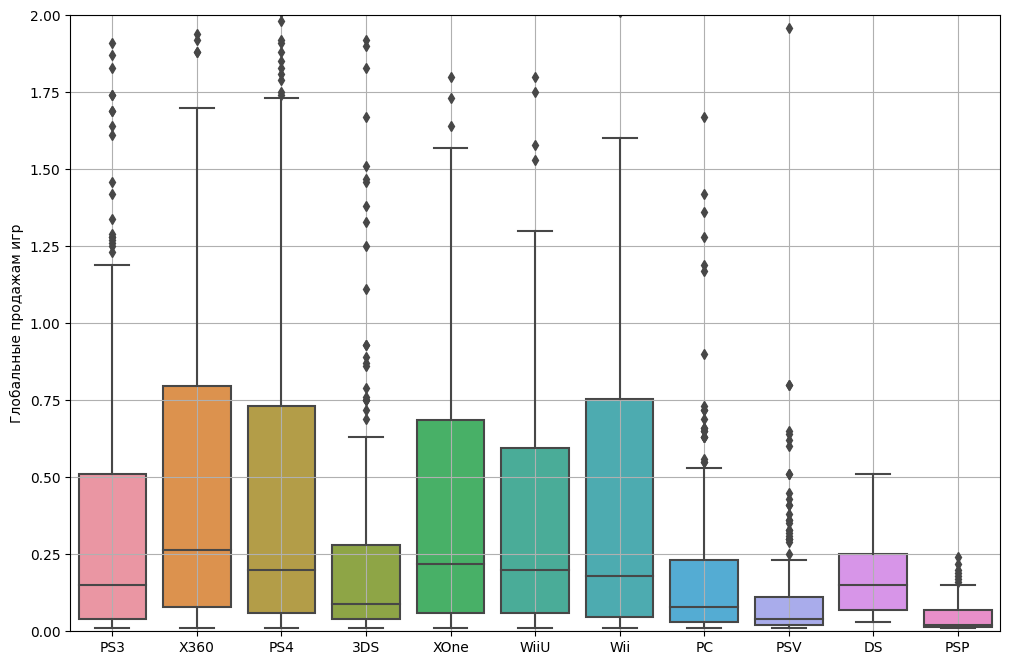

In [29]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=data_actual[['name', 'platform','total_sales']]
)

plt.ylim([0,2])
plt.grid(True)
plt.xlabel('')
plt.ylabel('Глобальные продажам игр');

Почти на всех диаграммах размаха есть выбросы, это значит, что есть более прибыльные игры внутри платформ, медианные значения продаж будут отличаться от средних.

Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

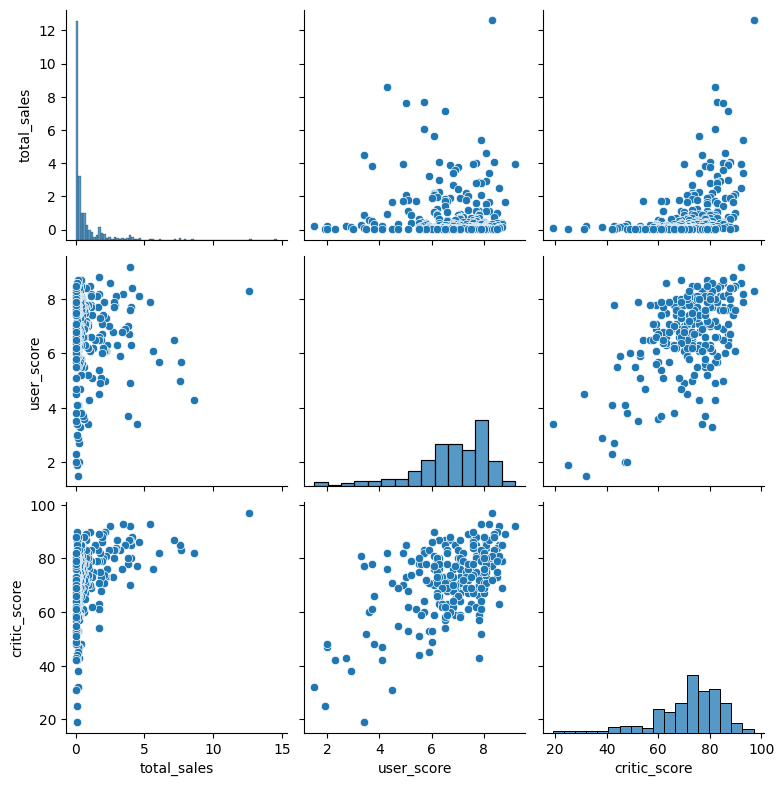

In [30]:
sns.pairplot(data_actual[data_actual['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']])
plt.gcf().set_size_inches(8,8);

In [31]:
data_actual[data_actual['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


In [32]:
platform_list = list(data_actual["platform"].unique())
platform_list.remove('PS4')

for p in platform_list:
    print(p)
    print(data_actual[data_actual['platform'] == p][['total_sales', 'user_score', 'critic_score']].corr())
    print()

PS3
              total_sales  user_score  critic_score
total_sales      1.000000    0.002394      0.334285
user_score       0.002394    1.000000      0.599920
critic_score     0.334285    0.599920      1.000000

X360
              total_sales  user_score  critic_score
total_sales      1.000000   -0.011742      0.350345
user_score      -0.011742    1.000000      0.520946
critic_score     0.350345    0.520946      1.000000

3DS
              total_sales  user_score  critic_score
total_sales      1.000000    0.241504      0.357057
user_score       0.241504    1.000000      0.769536
critic_score     0.357057    0.769536      1.000000

XOne
              total_sales  user_score  critic_score
total_sales      1.000000   -0.068925      0.416998
user_score      -0.068925    1.000000      0.472462
critic_score     0.416998    0.472462      1.000000

WiiU
              total_sales  user_score  critic_score
total_sales      1.000000    0.419330      0.376415
user_score       0.419330    1.000000

На всех платформах с достаточным количеством данных корреляцию между отзывами и продажами слабая.

Посмотрим на общее распределение игр по жанрам. Выявим самые прибыльные жанры, жанры с высокими и низкими продажами.

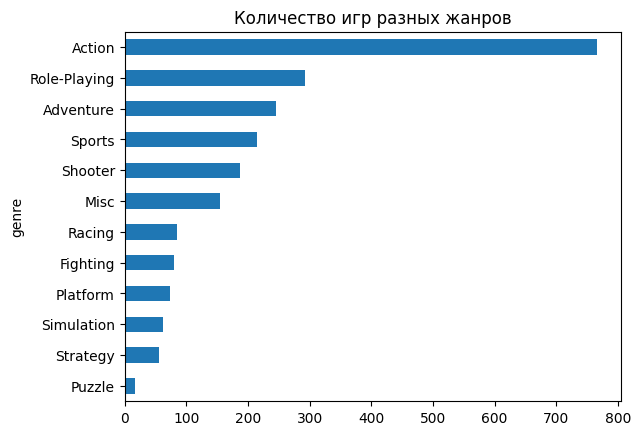

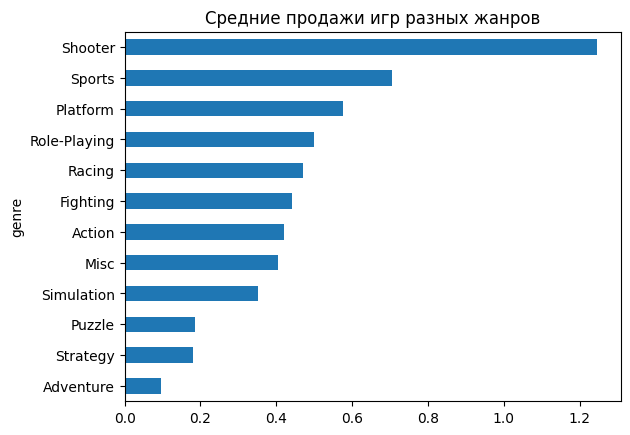

In [33]:
(
data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='count')
.sort_values(by='total_sales')
.plot(
    y='total_sales',
    kind='barh',
    legend = False
)
.set_title('Количество игр разных жанров')
);

(
data_actual.pivot_table(index=['genre'], values='total_sales')
.sort_values(by='total_sales')
.plot(
    y='total_sales',
    kind='barh',
    legend = False
)
.set_title('Средние продажи игр разных жанров')
);

Больше всего было продано игр жанров Action, Role-Playing, Adventure, Sports и Shooter. Средние продажи больше всего у жанра Shooter, Sports, Platform, Role-Playing и Racing. Игры жанра Action и Adventure по средним продажам в конце списка, у жанров Platform и Racing высокие средние продажи, но меньшее количество проданных игр. Можно сделать вывод, что самыми прибыльными являются жанры Role-Playing, Sports и Shooter, они и продаются в большом количестве и в среднем у игр в этих жанрах высокие продажи. У жанров Strategy и Puzzie низкие средние продажи и по количеству эти игры в конце списка.

**Вывод:** Для построения прогноза на 2017 год стоит учитывать только данные с 2013 года. В игровой индустрии происходит много изменений, по данным с 2000 года среди платформ с наибольшими суммарными продажами можно наблюдать, что со стартом продаж новых игр на более новых платформах остальные продажи падают. Потенциально прибыльными платформами можно считать PS4 и XOne. Внутри платформ есть игры, которые сильно отличаются по сумме продаж. Оценки пользователей практически не влияют на суммарные продажи внутри платформ, оценки критиков тоже не сильно влияют на продажи. У жанров Role-Playing, Sports и Shooter самые высокие средние продажи и количество проданных игр.

### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [34]:
data_actual_platform_na = (data_actual.pivot_table(
            index=['platform'], 
            values='na_sales', 
            aggfunc='sum')
        .sort_values(by='na_sales')
        .tail(5))

data_actual_platform_eu = (data_actual.pivot_table(
            index=['platform'], 
            values='eu_sales', 
            aggfunc='sum')
        .sort_values(by='eu_sales')
        .tail(5))

data_actual_platform_jp = (data_actual.pivot_table(
            index=['platform'], 
            values='jp_sales', 
            aggfunc='sum')
        .sort_values(by='jp_sales')
        .tail(5))

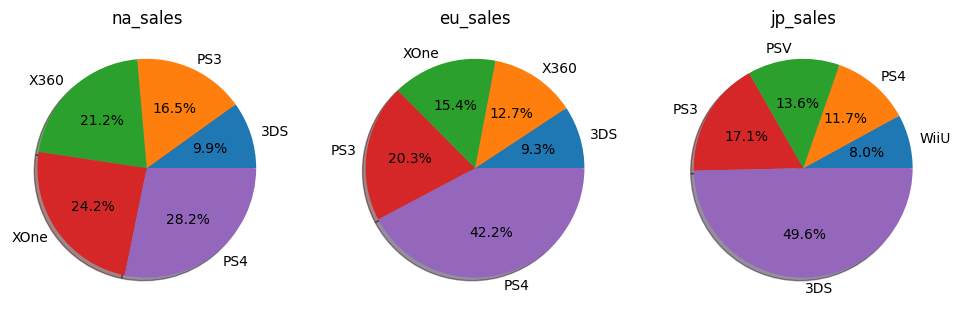

In [35]:
plt.gcf().set_size_inches(12,12)

plt.subplot(1, 3, 1)
plt.pie(data_actual_platform_na['na_sales'],
        autopct='%1.1f%%',
        shadow=True,
    labels = list(data_actual_platform_na.index))
plt.title('na_sales')

plt.subplot(1, 3, 2)
plt.pie(data_actual_platform_eu['eu_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_platform_eu.index))
plt.title('eu_sales')

plt.subplot(1, 3, 3)
plt.pie(data_actual_platform_jp['jp_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_platform_jp.index))
plt.title('jp_sales');

В Северной Америке и Европе в топе одни и те же платформы, но в Северной Америке лидирующие позиции у XOne и PS4, тогда как в Европе определенно лидирует PS4. Рынок Японии отличается, лидирует Nintendo 3DS, которая в Северной Америке и Европе имеет наименьшую долю, Xbox не попадает в топ-5 Японии.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

In [36]:
data_actual_genre_na = (data_actual.pivot_table(
            index=['genre'], 
            values='na_sales', 
            aggfunc='sum')
        .sort_values(by='na_sales')
        .tail(5))

data_actual_genre_eu = (data_actual.pivot_table(
            index=['genre'], 
            values='eu_sales', 
            aggfunc='sum')
        .sort_values(by='eu_sales')
        .tail(5))

data_actual_genre_jp = (data_actual.pivot_table(
            index=['genre'], 
            values='jp_sales', 
            aggfunc='sum')
        .sort_values(by='jp_sales')
        .tail(5))

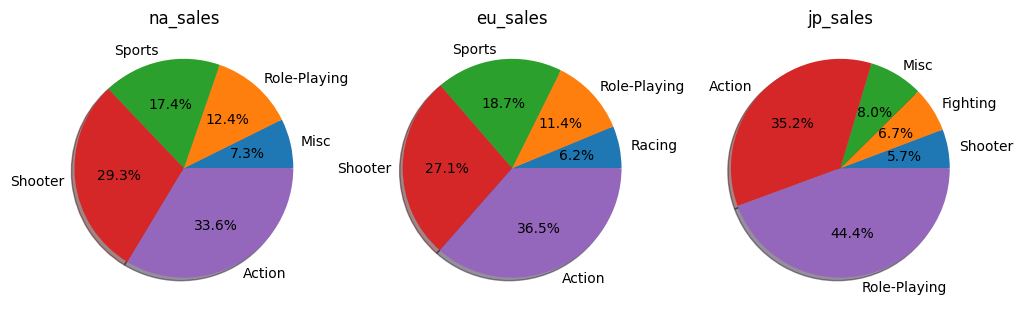

In [37]:
plt.gcf().set_size_inches(12,12)

plt.subplot(1, 3, 1)
plt.pie(data_actual_genre_na['na_sales'],
        autopct='%1.1f%%',
        shadow=True,
    labels = list(data_actual_genre_na.index))
plt.title('na_sales')

plt.subplot(1, 3, 2)
plt.pie(data_actual_genre_eu['eu_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_genre_eu.index))
plt.title('eu_sales')

plt.subplot(1, 3, 3)
plt.pie(data_actual_genre_jp['jp_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_genre_jp.index))
plt.title('jp_sales');

Топ-5 Северной Америки и Европы совпадает (больше 50% занимают суммарно Action и Shooter, далее идут Sports и Role-Playing), за исключением последнего места (в Северной Америке это Misc, а в Европе Racing. В Японии жанр Action не лидирует, а занимает только второе место, первое место за Role-Playing. Shooter в Японии идет в конце топ-5.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP).

In [38]:
data_actual_rating_na = (data_actual.pivot_table(
            index=['rating'], 
            values='na_sales', 
            aggfunc='sum')
        .sort_values(by='na_sales')
        .tail(5))

data_actual_rating_eu = (data_actual.pivot_table(
            index=['rating'], 
            values='eu_sales', 
            aggfunc='sum')
        .sort_values(by='eu_sales')
        .tail(5))

data_actual_rating_jp = (data_actual.pivot_table(
            index=['rating'], 
            values='jp_sales', 
            aggfunc='sum')
        .sort_values(by='jp_sales')
        .tail(5))

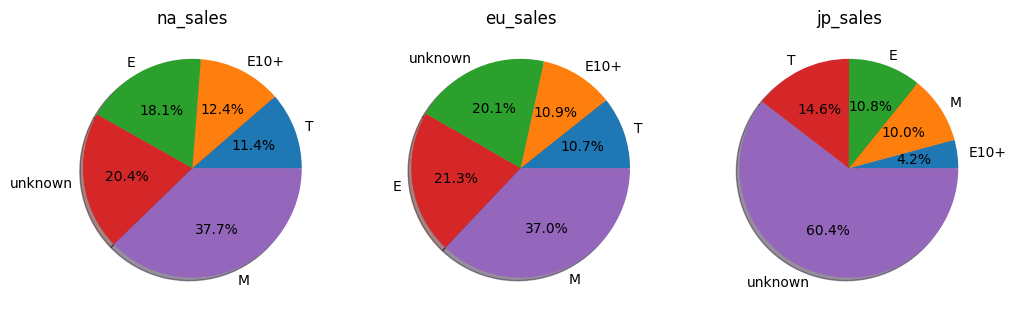

In [39]:
plt.gcf().set_size_inches(12,12)

plt.subplot(1, 3, 1)
plt.pie(data_actual_rating_na['na_sales'],
        autopct='%1.1f%%',
        shadow=True,
    labels = list(data_actual_rating_na.index))
plt.title('na_sales')

plt.subplot(1, 3, 2)
plt.pie(data_actual_rating_eu['eu_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_rating_eu.index))
plt.title('eu_sales')

plt.subplot(1, 3, 3)
plt.pie(data_actual_rating_jp['jp_sales'],
        autopct='%1.1f%%',
        shadow=True,
       labels = (data_actual_rating_jp.index))
plt.title('jp_sales');

Северная Америка и Европа практически идентичны по распределению продаж по рейтингу, лидируют игры с рейтингом 17+, затем идут игры для всех возрастов и игры без рейтинга ESRB, потом 10+ и 13+, они примерно одинаково распределены. В Японии же игры без рейтинга ESRB лидируют, затем с большим отставанием идут игры для подростков, примерно одинаково хорошо продаются игры для всех и 17+, 10+ продаются меньше всего. Пропуски в рейтинге говорят о том, что, либо нам нужно проверить выгрузку, либо о том, что это игры, которым не присваивала рейтинг организация ESRB. Например, в Японии есть CERO, которая присваивает играм рейтинги.

**Вывод:** Пользователи из Северной Америки и Европы похожи друг на друга, пользователи из Японии отличаются, посмотрим на лидирующие позиции по всем критериям.

In [40]:
df_world = [
    ['Северная Америка','PS4', 'Action', 'M'],
    ['Европа','PS4', 'Action', 'M'],
    ['Япония','3DS', 'Role-Playing', 'unknown'],
]

col_world = ['Страна', 'Платформа', 'Жанр', 'Рейтинг']

world = pd.DataFrame(data=df_world , columns=col_world)
world

,Страна,Платформа,Жанр,Рейтинг
0,Северная Америка,PS4,Action,M
1,Европа,PS4,Action,M
2,Япония,3DS,Role-Playing,unknown


### Проверка гипотез

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
```
H_0: Средняя оценка (user_score) пользователей "XOne" = средняя оценка (user_score) пользователей "PC"
H_a: Средняя оценка (user_score) пользователей "XOne" ≠ средняя оценка (user_score) пользователей "PC"
alpha = 0.05
```

Посмотрим размер выборок.

In [41]:
(
data_actual
.loc[((data_actual['platform'] == 'XOne')
                | (data_actual['platform'] == 'PC'))
                & (~data_actual['user_score'].isna())]
.pivot_table(
    index=['platform'], 
    values='user_score', 
    aggfunc='count')
)

,user_score
platform,
PC,155
XOne,182


Размер выборок разный, укажем equal_var = False.

In [42]:
results = st.ttest_ind(
    data_actual[data_actual['platform'] == 'XOne']['user_score'], 
    data_actual[data_actual['platform'] == 'PC']['user_score'], 
    equal_var = False,
    nan_policy = 'omit'
)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.
```
H_0: Средняя оценка пользователей (user_score) в жанре Action = средняя оценка пользователей (user_score) в жанре Sports
H_a: Средняя оценка пользователей (user_score) в жанре Action ≠ средняя оценка пользователей (user_score) в жанре Sports
alpha = 0.05
```

Посмотрим размер выборок.

In [43]:
(
data_actual
.loc[((data_actual['genre'] == 'Action')
                | (data_actual['genre'] == 'Sports'))
                & (~data_actual['user_score'].isna())]
.pivot_table(
    index=['genre'], 
    values='user_score', 
    aggfunc='count')
)

,user_score
genre,
Action,389
Sports,160


Размер выборок разный, укажем equal_var = False.

In [44]:
results = st.ttest_ind(
    data_actual[data_actual['genre'] == 'Action']['user_score'], 
    data_actual[data_actual['genre'] == 'Sports']['user_score'], 
    equal_var = False,
    nan_policy = 'omit'
)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700703482e-20
Отвергаем нулевую гипотезу


**Вывод:** У нас не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Мы отвергли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, значит они разные.

### Общий вывод

Желательно получить выгрузку без пропусков, не думаю, что игр без оценок так много, как пропусков в наших данных, возможно произошел сбой при выгрузке, возможно для разных рынков (особенно Японии) нужно рассматривать возрастные рейтинги других, локальных организаций.


Для построения прогноза на 2017 год стоит учитывать только актуальные данные, примерно за три года. В игровой индустрии происходит много изменений, появляются более новые платформы и игры для них. Потенциально прибыльными платформами можно считать PS4 и XOne, но не все игры для этих платформ, продажи различаются и в зависимости от игр. Оценки пользователей практически не влияют на суммарные продажи внутри платформ, оценки критиков тоже не сильно влияют на продажи. У жанров Role-Playing, Sports и Shooter самые высокие средние продажи и количество проданных игр, у жанров Platform и Racing высокие средние продажи, но меньшее количество проданных игр. Игры жанра Action и Adventure по средним продажам в конце списка, но в топе по количеству. У жанров Strategy и Puzzie низкие средние продажи и по количеству эти игры в конце списка.


Также стоит учитывать, что пользователи из Северной Америки и Европы похожи друг на друга, а пользователи из Японии отличаются по предпочтениям в играх. Если мы рассматриваем рынок в Японии, то самая популярная платформа там, это Nintendo 3DS, которая в Северной Америке и Европе имеет наименьшую долю, а в Северной Америке и Европе PS4. В Северной Америке лидирующие позиции также у XOne. Xbox не попадает в топ-5 Японии. Самый популярный жанр в Северной Америке и Европе Action. Топ-5 Северной Америки и Европы совпадает (больше 50% занимают суммарно Action и Shooter, далее идут Sports и Role-Playing), за исключением последнего места (в Северной Америке это Misc, а в Европе Racing). В Японии жанр Action не лидирует, а занимает только второе место, первое место за Role-Playing. Shooter в Японии идет в конце топ-5. Пользователи из Японии предпочитают игры без рейтинга ESRB (если ориентироваться на полученные для анализа данные), затем с большим отставанием идут игры для подростков, примерно одинаково хорошо продаются игры для всех и 17+, 10+ продаются меньше всего. У пользователей из Северной Америки и Европы предпочтения очень похожи, лидируют игры с рейтингом 17+, затем идут игры для всех возрастов и игры без рейтинга ESRB, потом 10+ и 13+, они примерно одинаково распределены.